In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample email
email = """
Subject: Hello there!
This is a sample email. The quick brown fox jumps over the lazy dog.
Regards,
John Doe
"""

### Cleaning ###

In [2]:
cleaned_email = re.sub(r'\S*@\S*\s?', '', email)  # Remove email addresses
cleaned_email = re.sub(r'http\S+', '', cleaned_email)  # Remove URLs
cleaned_email = re.sub(r'\n', ' ', cleaned_email)  # Remove newlines

print("\nCleaned Email:\n", cleaned_email)


Cleaned Email:
  Subject: Hello there! This is a sample email. The quick brown fox jumps over the lazy dog. Regards, John Doe 


### Tokenization ###

In [3]:
nltk.download('punkt')
tokens = nltk.word_tokenize(cleaned_email)

print("\nTokens:\n", tokens)


Tokens:
 ['Subject', ':', 'Hello', 'there', '!', 'This', 'is', 'a', 'sample', 'email', '.', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', 'Regards', ',', 'John', 'Doe']


[nltk_data] Downloading package punkt to /Users/gabriel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Stopword Removal ###

In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

print("\nTokens after Stopword Removal:\n", filtered_tokens)


Tokens after Stopword Removal:
 ['Subject', ':', 'Hello', '!', 'This', 'sample', 'email', '.', 'The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.', 'Regards', ',', 'John', 'Doe']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Stemming/Lemmatization ###

In [5]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stems = [stemmer.stem(word) for word in filtered_tokens]
lemmas = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print("\nStemmed Words:\n", stems)
print("\nLemmatized Words:\n", lemmas)


Stemmed Words:
 ['subject', ':', 'hello', '!', 'thi', 'sampl', 'email', '.', 'the', 'quick', 'brown', 'fox', 'jump', 'lazi', 'dog', '.', 'regard', ',', 'john', 'doe']

Lemmatized Words:
 ['Subject', ':', 'Hello', '!', 'This', 'sample', 'email', '.', 'The', 'quick', 'brown', 'fox', 'jump', 'lazy', 'dog', '.', 'Regards', ',', 'John', 'Doe']


### Vectorization ###
For Bag of Words

In [6]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(lemmas)

# For TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(lemmas)

# bow and tfidf are now the vectorized forms of the processed email

print("\nBag of Words Representation:\n", bow.toarray())



Bag of Words Representation:
 [[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]


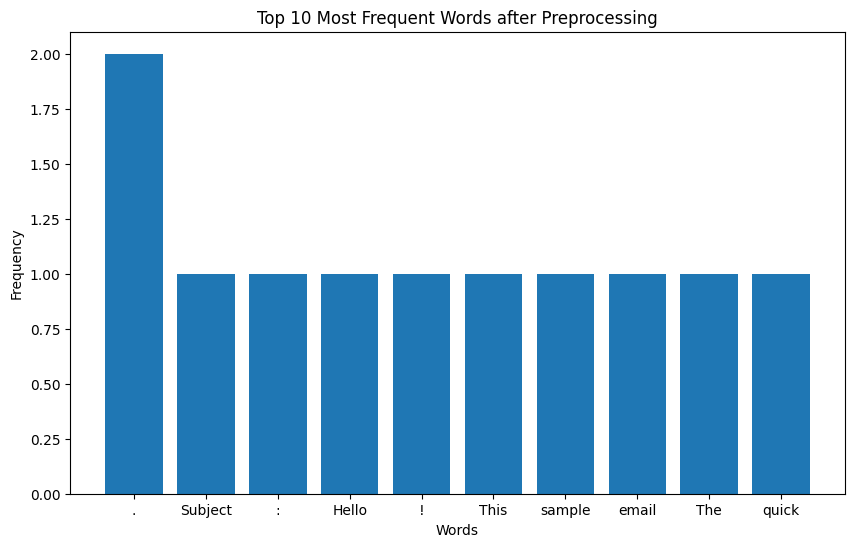

In [7]:
from matplotlib import pyplot as plt
from collections import Counter

# Visualization of the most frequent words
word_freq = Counter(lemmas)
most_common_words = word_freq.most_common(10)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words after Preprocessing')
plt.show()
